In [1]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Linear regression

In [9]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("../datasets/FuelConsumptionCo2.csv")
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


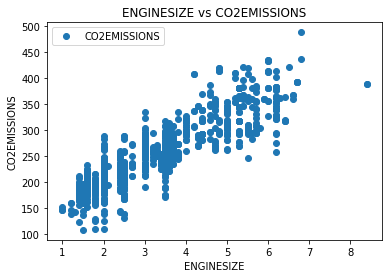

In [10]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

dataset.plot(x='ENGINESIZE', y='CO2EMISSIONS', style='o')  
plt.title('ENGINESIZE vs CO2EMISSIONS')  
plt.xlabel('ENGINESIZE')  
plt.ylabel('CO2EMISSIONS')  
plt.show()


# CO2EMISSIONS = W0 + W1 * ENGINESIZE

In [11]:
X = dataset['ENGINESIZE'].values.reshape(-1,1)
y = dataset['CO2EMISSIONS'].values.reshape(-1,1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
regressor = LinearRegression()

In [15]:
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

# y= 39.25 x + 126.19

[126.18920155]
[[39.24838431]]


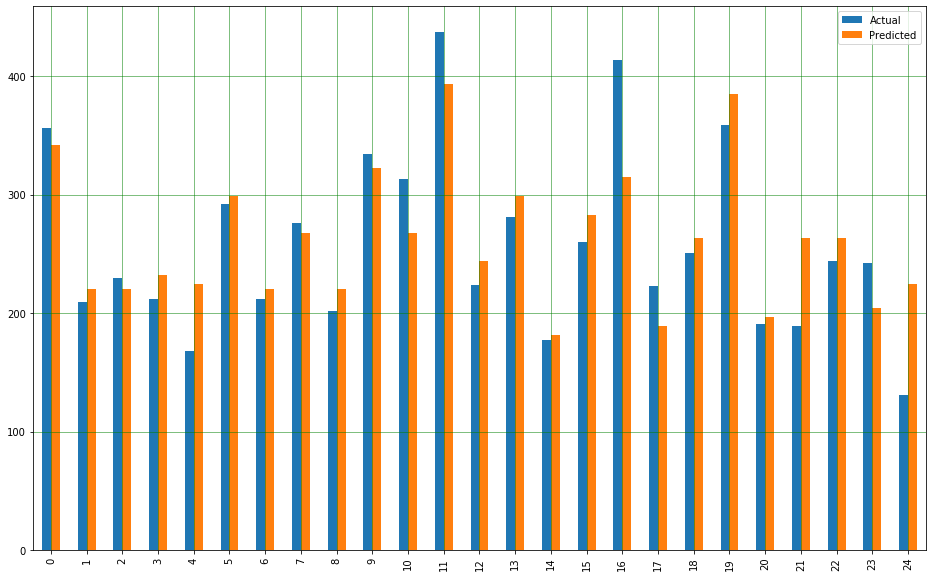

In [18]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



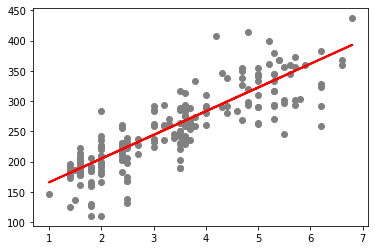

In [19]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 25.56889045602356


In [21]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Squared Error: 1181.528809303555
Root Mean Squared Error: 34.37337355139229


### Let's estimate the model coefficients using StatsModels

In [22]:

### STATSMODELS ###
import statsmodels.formula.api as smf

# create a fitted model
lm1 = smf.ols(formula='CO2EMISSIONS ~ ENGINESIZE', data=dataset).fit()

# print the coefficients
lm1.params

/Users/enayat/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Intercept     125.304099
ENGINESIZE     39.125200
dtype: float64

In [32]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'ENGINESIZE': [3.8]})

# predict for a new observation
lm1.predict(X_new)

0    273.979859
dtype: float64

In [23]:

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,120.555626,130.052573
ENGINESIZE,37.818255,40.432145


In [24]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues


Intercept     3.942726e-293
ENGINESIZE     0.000000e+00
dtype: float64

#### p-value: 
Represents the probability that the coefficient is actually zero

#### Interpreting p-values

If the 95% confidence interval does not include zero, p-value will be less than 0.05
- Reject the null
- There is a relationship

If the 95% confidence interval includes zero
p-value for that coefficient will be greater than 0.05
- Fail to reject the null
-  There is no relationship

Notes

p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. In this case, the p-value for ENGINESIZE is far less than 0.05
- Low probability coefficient actually zero
- Reject null hypothesis
- There is a relationship between ENGINESIZE ads and CO2EMISSIONS

We generally ignore the p-value for the intercept

In [35]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

# Is that a "good" R-squared value?

# It's hard to say
# The threshold for a good R-squared value depends widely on the domain
# Therefore, it's most useful as a tool for comparing different models


0.7641458597854816

Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

y=β0+β1x1+...+βnxn 
Each  x  represents a different feature, and each feature has its own coefficient. In this case:

y=β0+β1× ENGINESIZE +β2× CYLINDERS +β3× FUELCONSUMPTION_COMB 
Let's estimate these coefficients:

In [25]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='CO2EMISSIONS ~ ENGINESIZE + CYLINDERS + FUELCONSUMPTION_COMB', data=dataset).fit()

# print the coefficients
lm1.params

Intercept               65.223284
ENGINESIZE              10.855240
CYLINDERS                7.516225
FUELCONSUMPTION_COMB     9.595632
dtype: float64

In [26]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2251.
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:31:26   Log-Likelihood:                -4876.1
No. Observations:                1067   AIC:                             9760.
Df Residuals:                    1063   BIC:                             9780.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               65.2233      3.190     20.447      0.000      58.964      71.482
ENGINESIZE              10.8552      1.560      6.960      0.000       7.795      13.916
CYLINDERS                7.5162      1.118      6.723      0.000       5.322       9.710
FUELCONSUMPTION_COMB     9.5956      0.359     26.700      0.000       8.890      10.301
==============================================================================
Omnibus:                       50.180   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.657
Skew:                          -0.401   Prob(JB):                     3.73e-17
Kurtosis:                       4.028   Cond. No.                         67.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What are a few key things we learn from this output?

- ENGINESIZE, CYLINDERS and FUELCONSUMPTION_COMB have small p-values, and we can reject the null hypothesis for these features. There is association between features and CO2EMISSIONS.
- All these features are positively associated with CO2EMISSIONS
- This model has a higher R-squared (0.864) than the previous model. This model provides a better fit to the data than a model that only includes ENGINESIZE

In [45]:
from statsmodels.tools.eval_measures import rmse

# fit your model which you have already done

# now generate predictions
ypred = lm1.predict(X)

# calc rmse
rmse = rmse(y, ypred)
rmse

23.35987236363927

In [41]:
# Using Sklearn 
X = dataset[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = dataset['CO2EMISSIONS']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

23.77833770210973
